In [4]:
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

##### Cargue de Datos

In [5]:
housing = fetch_california_housing()

#### Crear Conjunto de dato de entrenamiento, validacion y prueba

In [7]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                             housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, 
                                                      y_train_full)

print('X_train:',X_train.shape)
print('X_test:',X_test.shape)
print('X_valid:',X_valid.shape)
print('y_train:',y_train.shape)
print('y_test:',y_test.shape)
print('y_valid:',y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


#### Escalar Datos

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

#### Modelo de red neuronal

In [9]:
model = keras.models.Sequential([keras.layers.Dense(30, activation='relu',
                                                   input_shape=X_train.shape[1:]),
                                keras.layers.Dense(1)])

C:\Users\ricar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compilar Modelo

In [14]:
model.compile(loss='mean_squared_error',optimizer='sgd',
             metrics =[keras.metrics.RootMeanSquaredError(),
                      'mean_absolute_percentage_error'])

#### Enternar Modelo

In [15]:
history = model.fit(X_train, y_train,
                   epochs=10,
                   validation_data = (X_valid, y_valid))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.3054 - mean_absolute_percentage_error: 43.5657 - root_mean_squared_error: 1.1088 - val_loss: 0.6140 - val_mean_absolute_percentage_error: 33.3830 - val_root_mean_squared_error: 0.7836
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - loss: 0.6790 - mean_absolute_percentage_error: 32.1487 - root_mean_squared_error: 0.8184 - val_loss: 0.6239 - val_mean_absolute_percentage_error: 36.2980 - val_root_mean_squared_error: 0.7899
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.5652 - mean_absolute_percentage_error: 31.8549 - root_mean_squared_error: 0.7510 - val_loss: 0.4781 - val_mean_absolute_percentage_error: 27.2647 - val_root_mean_squared_error: 0.6914
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - loss: 0.4611 - mean_absolute_percentage_error: 28.2355 - root_mean_squared_error: 0.6789 - val_loss: 0.4514 - val_mean_absolute_percentage_error: 27.2228 - val_root_mean_squared_error: 0.6718
Epoch 5/10

#### Graficar Historial Entrenamiento

KeyError: "['Val_mean_absolute_percentage_error'] not in index"

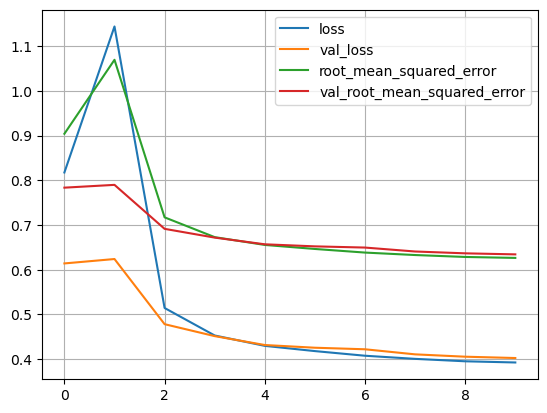

In [16]:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss','val_loss','root_mean_squared_error',
           'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error',
          'Val_mean_absolute_percentage_error']].plot(grid=True)

#### Evaluar el modelo en el conjunto de entrenamiento

In [17]:
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print('Evaluar el modelo ene el conjunto de entrenamiento')
print('loss train:', loss)
print('root_mean_squared_error train:', RMSE)
print('root_mean_squared_error train:', MAPE)

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step - loss: 0.3967 - mean_absolute_percentage_error: 25.6231 - root_mean_squared_error: 0.6293
Evaluar el modelo ene el conjunto de entrenamiento
loss train: 0.3893496096134186
root_mean_squared_error train: 0.623978853225708
root_mean_squared_error train: 25.951467514038086


#### Evaluar el modelo en el conjunto de validación

In [18]:
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print('Evaluar el modelo en el conjunto de validación')
print('loss valid:', loss)
print('root_mean_squared_error valid:', RMSE)
print('mean_absolute_percentage_error valid:', MAPE)

363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 0.3967 - mean_absolute_percentage_error: 25.6231 - root_mean_squared_error: 0.6293
Evaluar el modelo en el conjunto de validación
loss valid: 0.3893496096134186
root_mean_squared_error valid: 0.623978853225708
mean_absolute_percentage_error valid: 25.951467514038086


#### Evaluar el modelo en el conjunto de prueba

In [19]:
loss, RMSEA, MAPE = model.evaluate(X_test, y_test)
print('Evaluar el modelo en el conjunto de prueba')
print('loss test:', loss)
print('root_mean_squared_error test:',RMSE)
pritn('mean_absolute_percentage_error test:', MAPE)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step - loss: 0.3820 - mean_absolute_percentage_error: 25.0878 - root_mean_squared_error: 0.6171
Evaluar el modelo en el conjunto de prueba
loss test: 0.3901370167732239
root_mean_squared_error test: 0.623978853225708


NameError: name 'pritn' is not defined

#### Preguntas de Comprensión

1. Qué conjunto de datos se utiliza en este código y qué problema de aprendizaje automático se aborda?

2. ¿Qué hace la función  train_test_split() de scikit-learn y por qué se utiliza en este código?

3. ¿Por qué es importante estandarizar los datos antes de entrenar un modelo de redes neuronales?

4. ¿Qué arquitectura de red neuronal se utiliza en este código y cuántas capas tiene?

5. ¿Qué función de activación se utiliza en la capa oculta de la red neuronal y por qué se elige esa función?

6. ¿Qué función de pérdida se utiliza para compilar el modelo y qué métricas se utilizan para evaluar su rendimiento?

7. ¿Cuántas épocas se utilizan para entrenar el modelo y por qué se elige ese número?

### Ejercicios de Exploración

1. Modica el número de neuronas en la capa oculta de la red neuronal y observa cómo afecta el rendimiento del modelo.

2. Experimenta con diferentes optimizadores, como "adam" o "rmsprop", y observa cómo afectan el rendimiento del modelo.

3. Agrega una capa de regularización, como Dropout, a la red neuronal y observa cómo afecta el rendimiento del modelo.

4. Cambia la función de pérdida a "mean_absolute_error" y observa cómo afecta el rendimiento del modelo.

5. Entrena el modelo con un número diferente de épocas y observa cómo afecta el rendimiento del modelo.

6. Elimina la estandarización de los datos y observa cómo afecta el rendimiento del modelo.

7. Experimenta con diferentes arquitecturas de red neuronal, como agregar capas adicionales o cambiar el número de neuronas en cada capa, y observa cómo afectan el rendimiento del modelo.

8. Intenta resolver el problema utilizando otro conjunto de datos y compara los resultados con los obtenidos en el conjunto de datos de viviendas de California.